In [ ]:
from nodes.intake_node import extract_claim_info
from state import State
from nodes.risk_analyze_node import risk_assessment_agent
from nodes.routing_node import routing_node

from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.memory import InMemorySaver
 


def mock_node(state: State):
    return state



graph = StateGraph(State)

graph.add_node("Intake Node", extract_claim_info)
graph.add_node("Risk Analyze Node", risk_assessment_agent)
graph.add_node("Routing Node", routing_node)
graph.add_node("Orchestrator", mock_node)




def orchestrator(state: State):

    if state["claim_description"] is None:
        return "Intake Node"
    elif state["risk_assessment_report"] is None:
        return "Risk Analyze Node"
    elif state["routing_decision_report"] is None:
        return "Routing Node"
    else:
        return END




graph.add_edge(START, "Orchestrator")
graph.add_conditional_edges("Mock Node", orchestrator, {
    "Intake Node" : "Intake Node",
    "Risk Analyze Node" : "Risk Analyze Node",
    "Routing Node" : "Routing Node",
    END: END
})
graph.add_edge("Intake Node", "Mock Node")
graph.add_edge("Risk Analyze Node", "Mock Node")
graph.add_edge("Routing Node", "Mock Node")


checkpointer = InMemorySaver()
app = graph.compile(checkpointer=checkpointer)

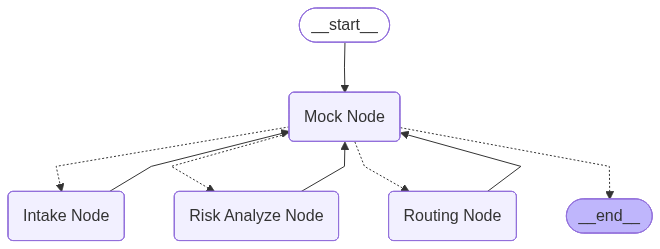

In [2]:
app